<a href="https://colab.research.google.com/github/ignacio727/03MAIR-Algoritmos-de-Optimizacion-2020/blob/main/03MAIR-Algoritmos%20de%20optimizacion/AG2/Ignacio_de_Jaime_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2 de Algoritmos de Optimización

### Ignacio de Jaime Hernández

https://colab.research.google.com/drive/1FwfPxIilY7TGoPpAJpquE_G6-BIavAxh?usp=sharing

https://github.com/ignacio727/03MAIR-Algoritmos-de-Optimizacion-2020/tree/main/03MAIR-Algoritmos%20de%20optimizacion

# Programación dinámica

## Problema: Viaje por el rio



In [2]:
def precios_ruta(tarifas, desde, hasta):
  N = len(tarifas[0]) # Número de nodos.
  # Inicialización de la lista de precios y rutas 
  # que empiezan desde el nodo 'desde'.
  precios = [999]*N
  ruta = ['']*N

  for j in range(desde+1, hasta+1):
    precios[j] = tarifas[desde][j]
    ruta[j] = ('Desde ' + str(desde) + ' hasta ' + str(j) + 
                      ' (Precio = ' + str(precios[j]) + ')\n')
    for k in range(desde+1, j+1):
      if precios[k] + tarifas[k][j] < precios[j]:
        precios[j] = precios[k] + tarifas[k][j]
        ruta[j] = (ruta[k] + 'Desde ' + str(k) + 
        ' hasta ' + str(j) + ' (Precio = ' + str(tarifas[k][j]) + ')\n')

  print('Coste total =', precios[hasta])
  print(ruta[hasta])

tarifas = [[0, 5, 4, 3, 999, 999, 999],
           [999, 0 ,999, 2, 3, 999, 11],
           [999, 999, 0, 1, 999, 4, 10],
           [999, 999, 999, 0, 5, 6, 9],
           [999, 999, 999, 999, 0, 999, 4],
           [999, 999, 999, 999, 999, 0, 3],
           [999, 999, 999, 999, 999, 999, 0]]

precios_ruta(tarifas, 0, 6)

Coste total = 11
Desde 0 hasta 2 (Precio = 4)
Desde 2 hasta 5 (Precio = 4)
Desde 5 hasta 6 (Precio = 3)



Para no hacer exactamente la misma función de la actividad guiada, se ha realizado una función que escriba por pantalla directamente precios y ruta. Además, sólo usa los datos que necesita, ya que no es necesario realizar la matriz completa de precios y rutas para hayar la ruta entre 2 nodos.

# Ramificación y Poda

## Problema: Asignación de tareas

In [6]:
def valor(S, costes):
  VALOR = 0
  for i in range(len(S)):
    VALOR += costes[S[i]][i]
  return VALOR

def CI(S, costes):
  VALOR = 0
  for i in range(len(S)):
    VALOR += costes[S[i]][i] # Valores establecidos
  # Estimación
  for i in range(len(costes)):
    if i not in S:
      VALOR += min([costes[j][i] for j in range(len(S), len(costes))])

  return VALOR

def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO + (i,)})
  return HIJOS

def ramificacion_y_poda(costes):
  # Construcción iterativa de soluciones
  dim = len(costes)
  mejor_solucion = tuple(i for i in range(dim))
  cota_sup = valor(mejor_solucion, costes)

  NODOS = []
  NODOS.append({'s':(), 'ci':CI((), costes)})

  iter = 0

  while (len(NODOS) > 0):
    iter += 1

    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']

    # Ramificación
    # Se generan los hijos
    hijos = [{'s':x['s'], 'ci':CI(x['s'], costes)} 
             for x in crear_hijos(nodo_prometedor, dim)]

    # Se revisa la cota superior y se coje la mejor solución
    # si llegamos a una solución final
    nodo_final = [x for x in hijos if len(x['s']) == dim]
    if len(nodo_final) > 0:
      if nodo_final[0]['ci'] < cota_sup:
        cota_sup = nodo_final[0]['ci']
        mejor_solucion = nodo_final

    # Poda
    hijos = [x for x in hijos if x['ci'] < cota_sup]

    # Se añaden los hijos
    NODOS.extend(hijos)

    # Se elimina el nodo ramificado
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

  print('La solución final es: ', mejor_solucion, ' en ', iter, 
        ' iteraciones, para dimensión ', dim)
  
costes = [[11, 12, 18, 40],
          [14, 15, 13, 22],
          [11, 17, 19, 23],
          [17, 14, 20, 28]]

ramificacion_y_poda(costes)

La solución final es:  [{'s': (0, 3, 1, 2), 'ci': 61}]  en  19  iteraciones, para dimensión  4


# Descenso del Gradiente

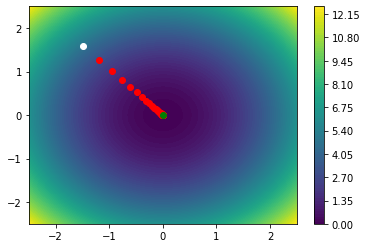

Solución =  [-1.8428061718889047e-97, 1.9603803345983938e-97] 7.23902564343195e-194


In [7]:
# Preparar entorno
import math
import matplotlib.pyplot as plt
import numpy as np
import random

# Funciones de paraboloide
f = lambda x: x[0]**2 + x[1]**2
df = lambda x: [2*x[0], 2*x[1]]

# Datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix, iy] = f([x, y])

# Pintar el mapa
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Punto aleatorio
p = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(p[0], p[1], 'wo')

# Tasa de aprendizaje
TA = 0.1

# Iteraciones
for _ in range(1000):
  grad = df(p)
  p[0], p[1] = p[0] - TA*grad[0], p[1] - TA*grad[1]
  plt.plot(p[0], p[1], 'ro')

# Gráfico con las iteraciones
plt.plot(p[0], p[1], 'go')
plt.show()
print('Solución = ', p, f(p))

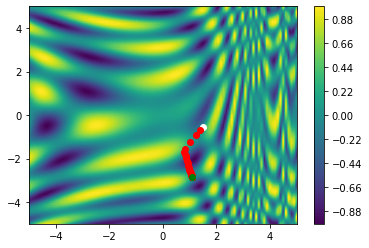

Solución =  [1.0976545751494309, -2.862964943080962] -0.9998408851237627 [0. 0.]


In [18]:
# Definimos otra función
f = lambda x: np.sin(1/2 * x[0]**2 - 1/4 * x[1]**2 + 3) * np.cos(2*x[0] + 1 - np.exp(x[1]))

# Aproximación de df en un punto
def df(p):
  h = 0.01
  T = np.copy(p)
  grad = np.zeros(len(p))
  for it,th in enumerate(p):
    T[it] = T[it] + h
    grad[it] = (f(T)-f(p)) / h
  return grad

# Datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix, iy] = f([x, y])

# Pintar el mapa
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Punto aleatorio
p = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(p[0], p[1], 'wo')

# Tasa de aprendizaje
TA = 0.2

# Iteraciones
for _ in range(1000):
  grad = df(p)
  p[0], p[1] = p[0] - TA*grad[0], p[1] - TA*grad[1]
  plt.plot(p[0], p[1], 'ro')

# Gráfico con las iteraciones
plt.plot(p[0], p[1], 'go')
plt.show()
print('Solución = ', p, f(p), df(p))